In [36]:
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import date
from bokeh.models import BoxAnnotation
from datetime import datetime as dt
from bokeh.plotting import figure, output_file, show
from statsmodels.graphics.tsaplots import plot_acf
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [37]:
infy = get_history(symbol='INFY',
                   start=date(2015,1,1),
                   end=date(2015,12,30))
tcs = get_history(symbol='TCS',
                   start=date(2015,1,1),
                   end=date(2015,12,30))

niftyit = pd.read_csv('NIFTYIT.csv') 
#downloaded from the webpage https://www.nseindia.com/products/content/equities/indices/historical_index_data.htm


# Part 1:

# 1. 

In [38]:
def MovingAverage(data,window):
    ma = data['Close'].rolling(window).mean()
    return(ma)

In [39]:
infy_ma = MovingAverage(infy,4)        
tcs_ma = MovingAverage(tcs,4)
niftyit_ma = MovingAverage(niftyit,4)

In [40]:
i = figure(title= 'INFY Moving Average Close plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.line(infy_ma.index,infy_ma,line_width=2)
show(i)

In [41]:
i = figure(title= 'TCS Moving Average Close plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.line(tcs_ma.index,tcs_ma,line_width=2)
show(i)

In [42]:
i = figure(title= 'NIFTY IT Moving Average Close plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.line(niftyit_ma.index,niftyit_ma,line_width=2)
show(i)

# 3.1 

In [46]:
def Volume_shocks(data):
    data['Prev_Volume']=data['Volume'].shift(+1)
    data.Prev_Volume.fillna(value=data.Volume[0],inplace=True)
    data['%Volume_Inc']=100*(data['Volume']-data['Prev_Volume'])/data['Prev_Volume']
    data['Volume_is_shock']=[1 if abs(i)>10 else 0 for i in data['%Volume_Inc']]
    data['direction_of_Volume_shock']=[1 if i>=0 else 0 for i in data['%Volume_Inc']]
    return(data)

In [50]:
infy=Volume_shocks(infy)
tcs=Volume_shocks(tcs)

In [83]:
i = figure(title= 'Volume Shock plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.line(infy.index,infy['%Volume_Inc'],line_width=2,legend='infy')
i.line(tcs.index,tcs['%Volume_Inc'],line_width=2,legend='tcs',color='red')
show(i)

# 3.2 

In [55]:
def Price_shocks(data):
    data['%Close_Inc']=100*(data['Close']-data['Prev Close'])/data['Prev Close']
    data['Close_is_shock']=[1 if abs(i)>2 else 0 for i in data['%Close_Inc']]
    data['direction_of_Close_shock']=[1 if i>=0 else 0 for i in data['%Close_Inc']]
    return(data)

In [57]:
infy=Price_shocks(infy)
tcs=Price_shocks(tcs)

In [82]:
i = figure(title= 'Close Shock plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.line(infy.index,infy['%Volume_Inc'],line_width=2,legend='infy')
i.line(tcs.index,tcs['%Volume_Inc'],line_width=2,color='red',legend='tcs')
show(i)

# 3.3

Pricing black swan already performed in 3.2

In [70]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Trades,Deliverable Volume,%Deliverble,Prev_Volume,%Volume_Inc,Volume_is_shock,direction_of_Volume_shock,%Close_Inc,Close_is_shock,direction_of_Close_shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,...,14908,258080,0.5154,500691.0,0.000000,0,1,0.093787,0,1
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,...,54166,1249104,0.7371,500691.0,238.448264,1,1,1.965154,0,1
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,...,82694,1830962,0.7370,1694580.0,46.600102,1,1,-0.859328,0,0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,...,108209,1772070,0.7332,2484256.0,-2.714173,0,0,-2.089283,1,0
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,...,62463,1317720,0.7270,2416829.0,-25.005906,1,0,0.478457,0,1


In [72]:
i = figure(title= 'INFY Percentage change in Close plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.line(infy.index,infy['%Close_Inc'],line_width=2)
show(i)

#Two major black swans are following:

In [39]:
infy[abs(infy['%Close_Inc'])>10]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Trades,Deliverable Volume,%Deliverble,Prev_Volume,%Volume_Inc,is_shock,direction of shock,%Close_Inc,Close_is_shock,direction_of_Close_shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-15,INFY,EQ,1975.05,976.95,998.8,968.0,994.00,990.45,990.17,2618213,...,84843,1444754,0.5518,2463231.0,6.291818,0,1,-49.851902,1,0
2015-07-21,INFY,EQ,1001.25,1035.00,1149.0,1035.0,1116.35,1112.65,1099.62,19155056,...,408583,9575992,0.4999,2188590.0,775.223591,1,1,11.126092,1,1


# 3.4 Pricing shock without volume shock - based on points a & b - Make a 0/1 dummy time series.

In [73]:
def Pricing_shock_without_volume_shock(data):
    data['Closing_shock_without_volume_shock']=[1 if (data['Close_is_shock'][k]==1)&(data['Volume_is_shock'][k]==0) else 0 for k in range(len(data))]
    return(data)

In [74]:
infy=Pricing_shock_without_volume_shock(infy)
tcs=Pricing_shock_without_volume_shock(tcs)

In [75]:
infy['Closing_shock_without_volume_shock'].value_counts()

0    242
1      5
Name: Closing_shock_without_volume_shock, dtype: int64

In [76]:
len(infy[infy['Close_is_shock']==1][infy['Volume_is_shock']==0])  #Verification

C:\Users\Nishant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5

# Part 2 (data visualization ):

# 1. 

In [84]:
i = figure(title= 'Close plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.line(infy.index,infy['Close'],line_width=2,legend='infy')
i.line(tcs.index,tcs['Close'],line_width=2,color='red',legend='tcs')
show(i)

# 2.

In [85]:
i = figure(title= 'Close plot with Blue color', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.background_fill_color = "lightblue"
i.background_fill_alpha = 0.5
i.line(infy.index,infy['Close'],line_width=2,legend='infy')
i.line(tcs.index,tcs['Close'],line_width=2,color='red',legend='tcs')
show(i)

# 3. 

In [79]:
date1,date2=infy[infy['%Volume_Inc']>390]['%Volume_Inc'].index.values

In [80]:
print(date1,date2)   #These are the shock dates which had maximum change in Volume Percentage

2015-07-21 2015-11-13


In [98]:
i = figure(title= 'Max % Change shock points highlighted Close plot for infy', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.background_fill_color = "lightblue"
i.background_fill_alpha = 0.5


i.line(infy.index,infy['Volume'],line_width=2)

box = BoxAnnotation(plot=i, left=date1,   right=date2, fill_alpha=0.5, fill_color='red')
i.renderers.extend([box])

show(i)

In [97]:
date1,date2=tcs[tcs['%Volume_Inc']>350]['%Volume_Inc'].index.values

i = figure(title= 'Max % Change shock points highlighted  Close plot for tcs', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.background_fill_color = "lightblue"
i.background_fill_alpha = 0.5


i.line(tcs.index,tcs['Volume'],line_width=2)

box = BoxAnnotation(plot=i, left=date1,   right=date2, fill_alpha=0.5, fill_color='red')
i.renderers.extend([box])

show(i)

# 5.

In [101]:
i = figure(title= 'INFY Close plot', x_axis_label='x',x_axis_type="datetime", y_axis_label='y',plot_width=800, plot_height=350,tools="pan,box_zoom,reset,save")
i.background_fill_color = "lightblue"
i.background_fill_alpha = 0.5
i.line(infy.index,infy['Closing_shock_without_volume_shock'],line_width=2,legend='infy')
i.line(tcs.index,tcs['Closing_shock_without_volume_shock'],line_width=2,color='red',legend='tcs')

show(i)

# 6.

Figure(432x288)


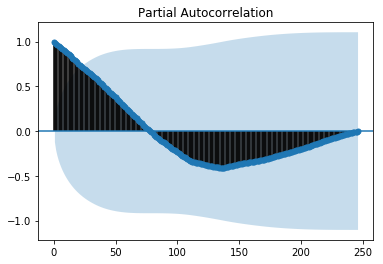

In [103]:
print(plot_acf(infy['Close'],title='Partial Autocorrelation'))

Figure(432x288)


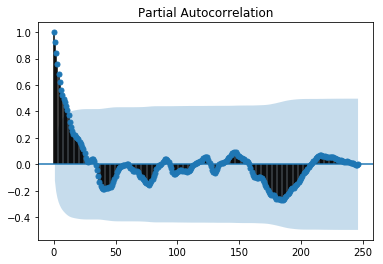

In [104]:
print(plot_acf(tcs['Close'],title='Partial Autocorrelation'))